In [ ]:
import pathlib

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

# CIFAR 10 Classification

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
#!wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:87.0) Gecko/20100101 Firefox/87.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,/;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3649/46718/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1619526844&Signature=DZIXNRw4kpcnSR9EWUNGXRXJ5GStCe0GAEaOt5POpSVlZDqFGwFL1yH%2FG4BSby77do3E15mivjRT%2FeNFpC1%2BIxzICf2q%2BkMr5A4c6nBDaI5pT3M3bwMOVraFoaUYz44YZWvXWGhxBYvrciZ1TaoL2%2BOSHfLpzeYDhn%2FsJPoudSJ5ekkoULkJzuJZOi5PJg8LLexl60qa3bLwHbIwPHu9DmIVKTQjN6yC3BLxtKgxqEfD%2F1CC86xJ6xfvB8oGp2TKHrXaQicFuoit10UOk3aavMYjl%2F9%2FicX83a2Si8rZl6ymhEeb7QHC9NhqkMTN18rdMM3zHY8aCspxXvVHFpTFGA%3D%3D&response-content-disposition=attachment%3B+filename%3Dcifar-10.zip' --output-document 'cifar-10.zip'

In [ ]:
#split into testing and training data  

(x_train, y_train) ,(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#data parameters

print("shape of training data ",x_train.shape)
print("shape of test data ",x_test.shape)
print("shape of training data outputs ",y_train.shape)
print("shape of test data outputs ",y_test.shape)

shape of training data  (50000, 32, 32, 3)
shape of test data  (10000, 32, 32, 3)
shape of training data outputs  (50000, 1)
shape of test data outputs  (10000, 1)


In [ ]:
print("shape of one input image  ",x_train[0].shape)

shape of one input image   (32, 32, 3)


In [ ]:
# range of target variable 
print("Max value in target varaibles ",int(max(y_train)))
print("Min value in target variables ",int(min(y_train)))

Max value in target varaibles  9
Min value in target variables  0


**Visualisation**

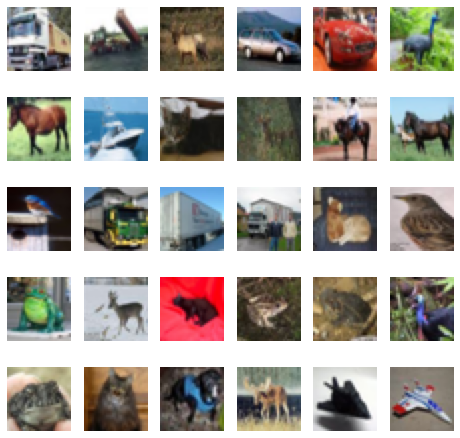

In [ ]:
fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

**Preprocessing**

In [ ]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train, 10)

In [ ]:
print("shape of categorical outputs", y_cat_train[0].shape)

shape of categorical outputs (10,)


Normalisation of Data 

In [ ]:
xtrain = x_train/255
xtest = x_test/255

In [ ]:
xtrain[0].shape

(32, 32, 3)

In [ ]:
clf = Sequential()

In [ ]:
initial_layers = [
          Conv2D(filters = 32, kernel_size = (4,4), input_shape = x_train[0].shape, activation ='relu',use_bias = True),
          #Conv2D(filters = 32, kernel_size = (4,4)),
          MaxPool2D(pool_size=(2,2)),
]

In [ ]:
for i in initial_layers:
  clf.add(i)

In [ ]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
clf.output_shape

(None, 14, 14, 32)

In [ ]:
clf.add(Flatten())
clf.add(Dense(128, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(64, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(32, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(10, activation='softmax'))

In [ ]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
clf.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'],
              steps_per_execution = 3)

stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
clf.fit(x_train,y_cat_train,batch_size=128,epochs=50,
          validation_data=(x_test,y_cat_test),
          callbacks=[stop])

Epoch 1/50
391/391 [==============================] - 35s 89ms/step - loss: 6.3967 - accuracy: 0.1232 - mse: 0.0994 - val_loss: 2.0708 - val_accuracy: 0.2470 - val_mse: 0.0847
Epoch 2/50
391/391 [==============================] - 32s 82ms/step - loss: 2.0572 - accuracy: 0.2483 - mse: 0.0843 - val_loss: 1.7181 - val_accuracy: 0.3742 - val_mse: 0.0748
Epoch 3/50
391/391 [==============================] - 32s 82ms/step - loss: 1.8058 - accuracy: 0.3443 - mse: 0.0771 - val_loss: 1.5731 - val_accuracy: 0.4347 - val_mse: 0.0698
Epoch 4/50
391/391 [==============================] - 32s 82ms/step - loss: 1.6413 - accuracy: 0.4026 - mse: 0.0719 - val_loss: 1.4808 - val_accuracy: 0.4751 - val_mse: 0.0661
Epoch 5/50
391/391 [==============================] - 32s 82ms/step - loss: 1.5325 - accuracy: 0.4523 - mse: 0.0676 - val_loss: 1.4353 - val_accuracy: 0.4968 - val_mse: 0.0640
Epoch 6/50
391/391 [==============================] - 37s 93ms/step - loss: 1.4417 - accuracy: 0.4878 - mse: 0.0641 - va

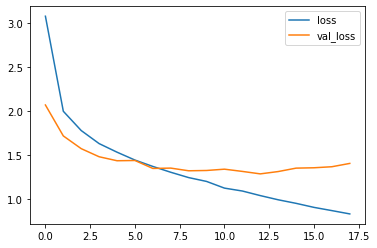

In [ ]:
loss = pd.DataFrame(clf.history.history)

loss[['loss','val_loss']].plot()

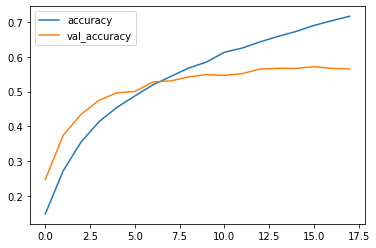

In [ ]:
loss[['accuracy','val_accuracy']].plot()

In [ ]:
print(clf.metrics_names)
print(clf.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy', 'mse']
[1.4049217700958252, 0.5652999877929688, 0.0581139512360096]


In [ ]:
predictions = np.argmax(clf.predict(x_test), axis=-1)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1000
           1       0.74      0.68      0.71      1000
           2       0.44      0.42      0.43      1000
           3       0.34      0.49      0.40      1000
           4       0.47      0.37      0.42      1000
           5       0.48      0.44      0.46      1000
           6       0.61      0.71      0.66      1000
           7       0.73      0.53      0.62      1000
           8       0.66      0.73      0.69      1000
           9       0.65      0.69      0.67      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



Adding more layers to improve accurcay 

In [ ]:
clf1 = Sequential()

In [ ]:
layers = [
          Conv2D(filters = 32, kernel_size = (3,3), input_shape = x_train[0].shape, activation ='relu',use_bias = True),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(filters = 64, kernel_size = (3,3)),
          MaxPool2D(pool_size=(2,2)),
          
]

In [ ]:
for i in layers:
  clf1.add(i)

In [ ]:
clf1.add(Flatten())
clf1.add(Dense(128, activation='relu'))
#clf1.add(Dropout(0.2))
clf1.add(Dense(64, activation='relu'))
#clf1.add(Dropout(0.2))
clf1.add(Dense(32, activation='relu'))
#clf1.add(Dropout(0.2))
clf1.add(Dense(10, activation='softmax'))

In [ ]:
clf1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'],
              steps_per_execution = 3)

stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
clf1.fit(x_train,y_cat_train,batch_size=128,epochs=50,
          validation_data=(x_test,y_cat_test),
          callbacks=[stop])

Epoch 1/50
391/391 [==============================] - 59s 150ms/step - loss: 4.5762 - accuracy: 0.2386 - mse: 0.0953 - val_loss: 1.5972 - val_accuracy: 0.4366 - val_mse: 0.0700
Epoch 2/50
391/391 [==============================] - 55s 141ms/step - loss: 1.4916 - accuracy: 0.4683 - mse: 0.0668 - val_loss: 1.3275 - val_accuracy: 0.5251 - val_mse: 0.0606
Epoch 3/50
391/391 [==============================] - 55s 141ms/step - loss: 1.2587 - accuracy: 0.5541 - mse: 0.0576 - val_loss: 1.2785 - val_accuracy: 0.5502 - val_mse: 0.0584
Epoch 4/50
391/391 [==============================] - 55s 141ms/step - loss: 1.1281 - accuracy: 0.6048 - mse: 0.0522 - val_loss: 1.1606 - val_accuracy: 0.5992 - val_mse: 0.0533
Epoch 5/50
391/391 [==============================] - 55s 141ms/step - loss: 1.0315 - accuracy: 0.6403 - mse: 0.0480 - val_loss: 1.1261 - val_accuracy: 0.6105 - val_mse: 0.0520
Epoch 6/50
391/391 [==============================] - 55s 140ms/step - loss: 0.9505 - accuracy: 0.6682 - mse: 0.044

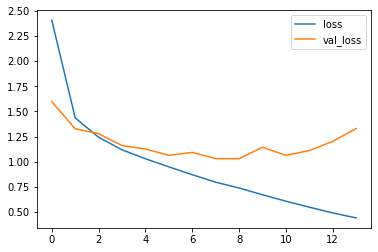

In [ ]:
loss = pd.DataFrame(clf1.history.history)

loss[['loss','val_loss']].plot()

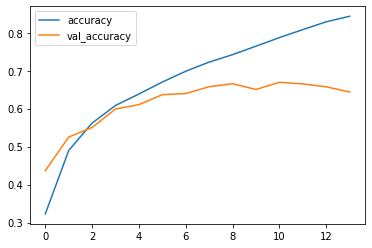

In [ ]:
loss[['accuracy','val_accuracy']].plot()

In [ ]:
new_predictions = np.argmax(clf1.predict(x_test), axis=-1)

In [ ]:
new_predictions 

array([3, 8, 1, ..., 2, 4, 7])

In [ ]:
print(clf1.metrics_names)
print(clf1.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy', 'mse']
[1.3291741609573364, 0.6437000036239624, 0.05238771438598633]


In [ ]:
print(classification_report(y_test,new_predictions))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1000
           1       0.79      0.76      0.77      1000
           2       0.56      0.52      0.54      1000
           3       0.40      0.57      0.47      1000
           4       0.62      0.54      0.58      1000
           5       0.61      0.42      0.50      1000
           6       0.62      0.84      0.71      1000
           7       0.78      0.65      0.71      1000
           8       0.69      0.82      0.75      1000
           9       0.83      0.61      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



# Classification using Gray Scale Images

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

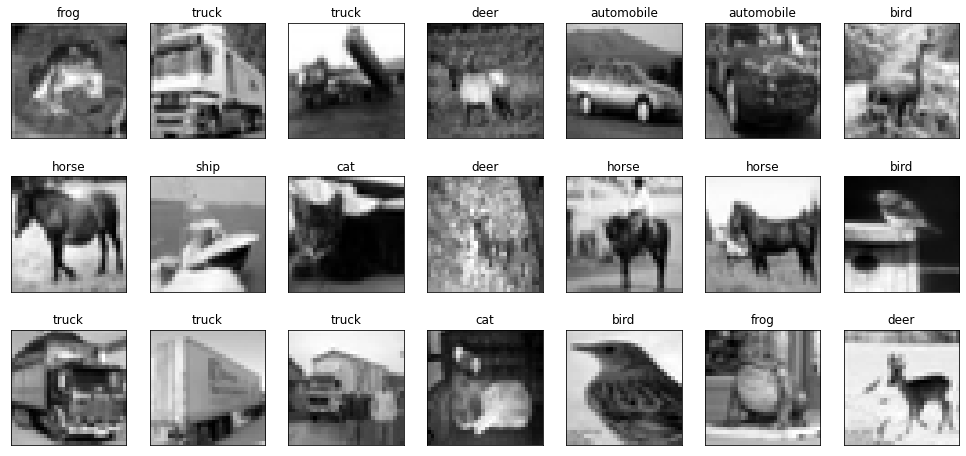

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
X_train  = X_train/255
X_test  = X_test/255

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
cnn = Sequential()

layers_g = [
        (Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same',input_shape = (X_train.shape[1], X_train.shape[2], 1))),
        (Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')),
        (Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')),
        (MaxPool2D((2, 2))),
        (Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')),
        (Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')),
        (Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')),
        (MaxPool2D((2, 2)))
]

In [ ]:
for i in layers_g:
  cnn.add(i)



In [ ]:
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [ ]:
cnn.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [ ]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 16)        9232      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
history = cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[stop])

Epoch 1/20
1563/1563 [==============================] - 369s 235ms/step - loss: 2.0093 - acc: 0.2421 - val_loss: 1.4166 - val_acc: 0.4835
Epoch 2/20
1563/1563 [==============================] - 368s 236ms/step - loss: 1.4162 - acc: 0.4898 - val_loss: 1.2109 - val_acc: 0.5718
Epoch 3/20
1563/1563 [==============================] - 366s 234ms/step - loss: 1.2194 - acc: 0.5688 - val_loss: 1.1268 - val_acc: 0.6014
Epoch 4/20
1563/1563 [==============================] - 368s 235ms/step - loss: 1.1029 - acc: 0.6113 - val_loss: 1.0623 - val_acc: 0.6292
Epoch 5/20
1563/1563 [==============================] - 368s 236ms/step - loss: 1.0254 - acc: 0.6420 - val_loss: 1.0270 - val_acc: 0.6429
Epoch 6/20
1563/1563 [==============================] - 367s 235ms/step - loss: 0.9584 - acc: 0.6654 - val_loss: 0.9705 - val_acc: 0.6610
Epoch 7/20
1563/1563 [==============================] - 370s 237ms/step - loss: 0.9046 - acc: 0.6839 - val_loss: 0.9911 - val_acc: 0.6565
Epoch 8/20
1563/1563 [============

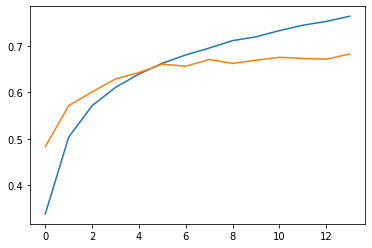

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

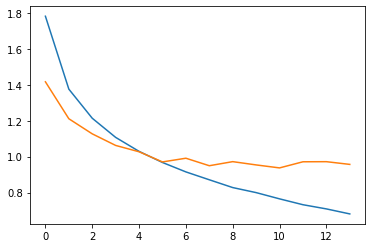

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
print(cnn.metrics_names)
print(cnn.evaluate(X_test,y_test,verbose=0))

['loss', 'acc']
[0.9566937685012817, 0.682699978351593]


In [ ]:
predictions = cnn.predict(X_test)
predictions = encoder.inverse_transform(predictions)
y_test = encoder.inverse_transform(y_test)

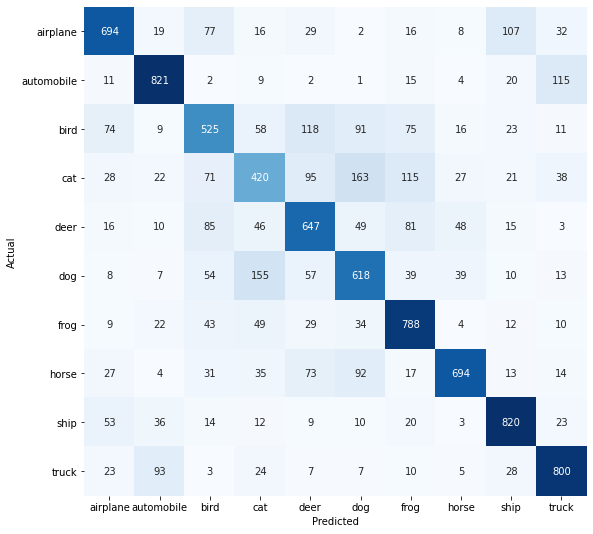

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

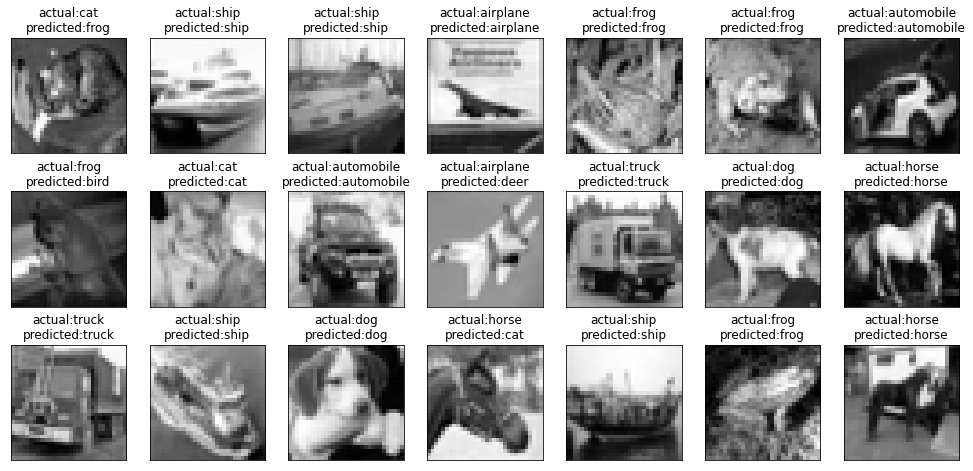

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Data Augmentation

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
#X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(X_train)

In [ ]:
x_batch, y_batch = datagen.flow(X_train, y_train, batch_size = 9)[0]


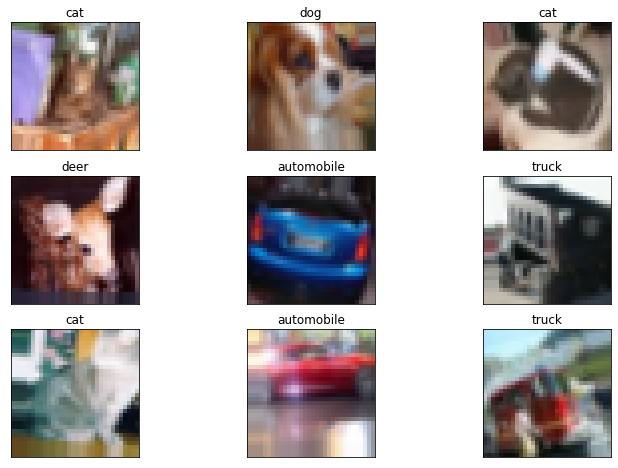

In [ ]:
#Augmented Images
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12,8))
index = 0
for i in range(3):
    for j in range(3):
        axes[i,j].set_title(labels[y_batch[index][0]])
        axes[i,j].imshow(x_batch[index].astype(np.uint8))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
x_batch = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_batch])

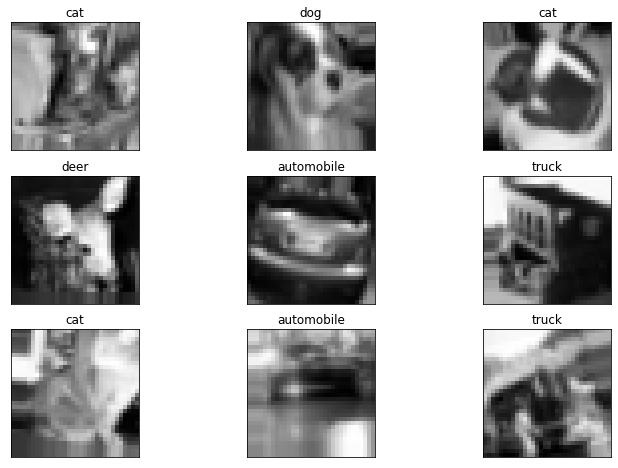

In [ ]:
#Augmented Images
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12,8))
index = 0
for i in range(3):
    for j in range(3):
        axes[i,j].set_title(labels[y_batch[index][0]])
        axes[i,j].imshow(x_batch[index].astype(np.uint8), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
#X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
#X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
